# Data Bootcamp:  Examples

Most of what we do in this course is find some data that interests us, read it into Python, organize it in a convenient form, and produce a graph.  The details vary, but that's the general plan.  The best-case scenario:  The graph tells us something we don't know, and points to other things we'd like to follow up on.  As for the Python code: You'll be able to do all this and more by the end of the term.  

Examples follow.  All of them are based on data that's accessible in some form on the internet.  

* GDP per person around the world 
* GDP in the US over time
* Economic conditions in the US 
* Government debt in Greece and elsewhere
* Stock prices:  Apple and Google 
* Equity returns:  Fama-French "factors"
* Income by college major 
* Japan's aging population 

This IPython notebook was created by Dave Backus for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

## Preliminaries

In [7]:
# import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# IPython command, puts plots in notebook 
%matplotlib inline

# check Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

Today is 2016-01-19
What version of Python are we running? 
3.5.0 |Anaconda 2.4.0 (64-bit)| (default, Oct 20 2015, 07:26:33) [MSC v.1900 64 bit (AMD64)]


---
## Example:  Comparing countries by GDP and GDP per capita

**GDP** is the total value of output produced in a country.  **GDP per capita** is the per person version -- GDP divided by the population.  Both are expressed here in 2011 US dollars with an adjustment for the cost of living.  They come from the World Bank's *World Development Indicators*, a great source of information about economic and social conditions around the world.  See the World Bank's [data catalog](http://datacatalog.worldbank.org/) for other things you can find here.

In [8]:
from pandas.io import wb               # World Bank api 

# read data from World Bank  
var  = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.MKTP.PP.KD']         # variable list 
iso  = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']  # country list (ISO codes)
year = 2014 
df = wb.download(indicator=var, country=iso, start=year, end=year)

# massage data 
df = df.reset_index(level='year', drop=True)
df.columns = ['gdppc', 'gdp']          # rename variables 
df['gdp'] = df['gdp']/10**12           # convert to trillions
df['gdppc'] = df['gdppc']/10**3        # convert to thousands 
df['order'] = [5, 3, 1, 4, 2, 6, 0]    # reorder countries 
#df = df.sort(columns='order', ascending=False)  # old version, deprecated 
df = df.sort_values(by='order', ascending=False)
df

C:\Users\dbackus\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\io\wb.py:19: FutureWarning: 
The pandas.io.wb module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


,gdppc,gdp,order
country,,,
Mexico,16.284152,2.041802,6
Brazil,15.109826,3.113801,5
India,5.438616,7.044594,4
China,12.599182,17.188686,3
Japan,35.634971,4.530338,2
France,37.214407,2.463852,1
United States,52.117746,16.618111,0


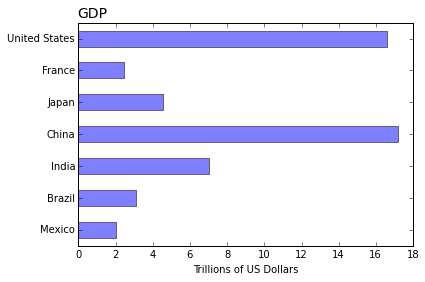

In [9]:
# GDP bar chart 
ax = df['gdp'].plot(kind='barh', alpha=0.5)
ax.set_title('GDP', loc='left', fontsize=14)
ax.set_xlabel('Trillions of US Dollars')
ax.set_ylabel('')

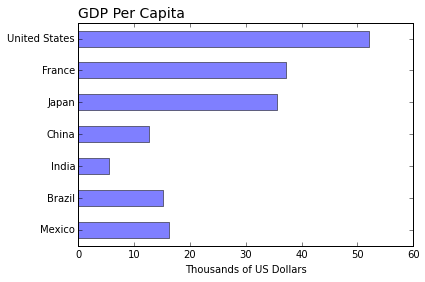

In [10]:
# ditto for GDP per capita (per person)
ax = df['gdppc'].plot(kind='barh', color='blue', alpha=0.5) 
ax.set_title('GDP Per Capita', loc='left', fontsize=14)
ax.set_xlabel('Thousands of US Dollars')
ax.set_ylabel('')

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Example:  GDP per person back to 1870

Angus Maddison somehow constructed GDP and population numbers going back to the year 0 in some cases.  And from 1870 on, we have more or less complete time series for many countries.  The figures below look at several countries over this period, which shows us significant differences not only in their current level of performance, but in their histories.  His work in now continued as the [Maddison Project](http://www.ggdc.net/maddison/maddison-project/home.htm).  

In [35]:
# read the data 
url = 'http://www.ggdc.net/maddison/maddison-project/data/mpd_2013-01.xlsx'
mpd = pd.read_excel(url, skiprows=2, index_col=0, na_values=[' ']) 
#list(mpd) 

In [15]:
# extract countries, convert to log base 2 
mpd = mpd[['England/GB/UK', 'USA', 'Japan ', 'China ', 'India ', 'Argentina ']].dropna()
mpd = mpd.rename(columns={'England/GB/UK': 'UK'})
mpd = np.log(mpd)/np.log(2)

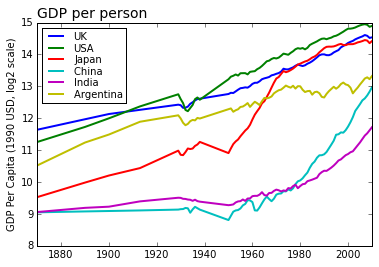

In [17]:
# plot 
ax = mpd.plot(lw=2)
ax.set_title('GDP per person', fontsize=14, loc='left')
ax.set_ylabel('GDP Per Capita (1990 USD, log2 scale)')
ax.legend(loc='upper left', fontsize=10, handlelength=2, labelspacing=0.15)

**Comment:**  Each difference of one on the y axis represents a factor of two.  

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?   

---
## Example:  US economic conditions 1

We see a lot of variation in GDP growth rates in all countries.  It's not obvious why, but it's  a fact of life.  Here we look at US GDP and its growth rate. 

In [16]:
# get data from FRED
import pandas.io.data as web           # web interface with FRED
import datetime as dt                  # handles dates 
import matplotlib.pyplot as plt        # plotting 

fred_series = ["GDPC1"]                                       # the real GDP code for FRED
start_date = dt.datetime(1960, 1, 1)
fred = web.DataReader(fred_series, "fred", start_date)/10**3  # convert to trillions of USD 

C:\Users\dbackus\Anaconda3\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


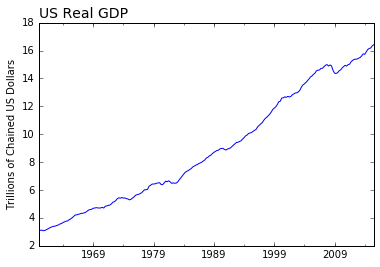

In [17]:
# plot 
ax = fred.plot(legend=False)
ax.set_title('US Real GDP', fontsize=14, loc='left')
ax.set_xlabel('')
ax.set_ylabel('Trillions of Chained US Dollars')
ax.legend().set_visible(False)

Average growth rate: GDPC1    3.014859
dtype: float64


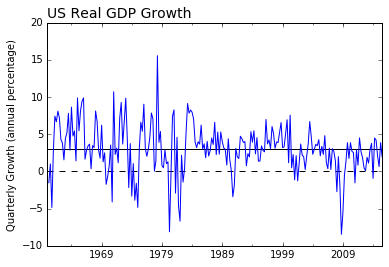

In [18]:
# compute quarterly growth rates 
g = 400*fred.pct_change()           # 400 makes this an annual percentage  
gbar = g.mean()
print('Average growth rate (percent):', gbar)

start = g.index[0]                  # first observation 
end = g.index[-1]                   # last observation 
ax = g.plot()
ax.set_title('US Real GDP Growth', fontsize=14, loc='left')
ax.set_xlabel('')
ax.set_ylabel('Quarterly Growth (annual percentage)')
ax.hlines(y=gbar, xmin=start, xmax=end)
ax.hlines(y=0, xmin=start, xmax=end, linestyles='dashed')
ax.legend().set_visible(False)

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

---
## Example:  US economic conditions 2

Employment, asset returns, and many other things are tied to the state of the economy.  We generally have a lot more information than GDP.  Of the hundreds of economic indicators, some of the most popular (with FRED codes) are 

* INDPRO:  industrial production
* PAYEMS:  nonfarm employment 
* AWHMAN:  average weekly hours worked in manufacturing
* PERMIT:  premits for new housing
* NAPM:  purchasing managers index 

You can find more about this kind of thing in [our book](http://www.stern.nyu.edu/experience-stern/about/departments-centers-initiatives/centers-of-research/global-economy-business/development-initiatives/global-economy-course), chapter 11.  

In [23]:
# get data from FRED
import pandas.io.data as web           # web interface with FRED
import pandas as pd                    # data manipulation 
import numpy as np                     # ditto  
import datetime as dt                  # handles dates 
import matplotlib.pyplot as plt        # plotting 
import matplotlib as mpl

# get data 
indicators = ['INDPRO', 'PAYEMS', 'AWHMAN', 'PERMIT', 'NAPM']
start_date = dt.datetime(1970, 1, 1)
inds = web.DataReader(indicators, "fred", start_date)
end = inds.index[-1]

# yoy growth rates 
g = inds.pct_change(periods=12).dropna()
# standardize
g_std = (g - g.mean()) / g.std()

C:\Users\dbackus\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


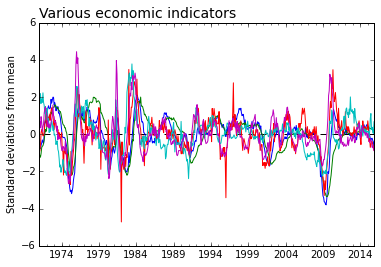

In [24]:
# plot 
ax = g_std.plot()
ax.set_title('Various economic indicators', fontsize=14, loc='left')
ax.set_ylabel('Standard deviations from mean')
ax.set_xlabel('')
ax.hlines(y=0, xmin=start_date, xmax=end, linestyles='dashed')
ax.legend().set_visible(False)

In [37]:
# focus on recent past 
recent_date = dt.datetime(2011, 1, 1)
g_std = g_std[g_std.index>=recent_date]

C:\Users\dbackus\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


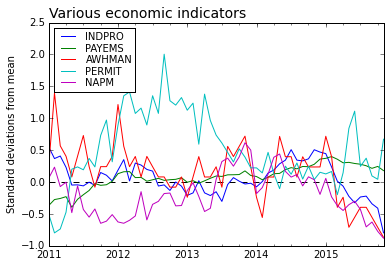

In [38]:
ax = g_std.plot()
ax.set_title('Various economic indicators', fontsize=14, loc='left')
ax.set_ylabel('Standard deviations from mean')
ax.set_xlabel('')
ax.hlines(y=0, xmin=recent_date, xmax=end, linestyles='dashed')
ax.legend(loc='upper left', fontsize=10, handlelength=2, labelspacing=0.15)

**Question for Chase or Spencer:** Can we do a heatmap of this?  Not worth a lot of time.  

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Government debt 

Governments typically issue debt, and one of the traditional ways for a country to get into trouble is to issue so much debt that investors worry about getting paid back.  How much is that?  Hard to say, but we'll look at some debt numbers from the IMF's World Economic Outlook or [WEO](https://www.imf.org/external/ns/cs.aspx?id=28), a popular source of international data on debt, deficits, and other macroeconomic indicators.  We use numbers for the ratio of government debt to GDP.  

In [1]:
%%time 
import pandas as pd
import matplotlib.pyplot as plt

url1 = 'http://www.imf.org/external/pubs/ft/weo/2015/01/weodata/'
url2 = 'WEOApr2015all.xls'
url = url1 + url2 
weo = pd.read_csv(url, sep='\t', thousands=',', na_values=['n/a', '--']) 
weo.shape

Wall time: 40.4 s


In [2]:
list(weo[list(range(15))])

['WEO Country Code',
 'ISO',
 'WEO Subject Code',
 'Country',
 'Subject Descriptor',
 'Subject Notes',
 'Units',
 'Scale',
 'Country/Series-specific Notes',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985']

In [3]:
country_guide = weo[['ISO', 'Country']].drop_duplicates().set_index('ISO')

variable_guide = weo[['WEO Subject Code', 'Subject Descriptor', 'Subject Notes']].drop_duplicates().set_index('WEO Subject Code')
variable_guide

,Subject Descriptor,Subject Notes
WEO Subject Code,,
NGDP_R,"Gross domestic product, constant prices",Expressed in billions of national currency uni...
NGDP_RPCH,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...
NGDP,"Gross domestic product, current prices",Expressed in billions of national currency uni...
NGDPD,"Gross domestic product, current prices",Values are based upon GDP in national currency...
NGDP_D,"Gross domestic product, deflator",The GDP deflator is derived by dividing curren...
NGDPRPC,"Gross domestic product per capita, constant pr...",GDP is expressed in constant national currency...
NGDPPC,"Gross domestic product per capita, current prices",GDP is expressed in current national currency ...
NGDPDPC,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...
NGAP_NPGDP,Output gap in percent of potential GDP,Output gaps for advanced economies are calcula...


In [11]:
variables = ['GGXWDG_NGDP']
countries = ['ARG', 'DEU', 'FRA', 'GRC', 'USA']
debt = weo[weo['ISO'].isin(countries) & weo['WEO Subject Code'].isin(variables)]
some = [3] + list(range(9,44))
debt = debt[some].set_index('Country').T.dropna()
debt

Country,Argentina,France,Germany,Greece,United States
2001,44.886,57.943,57.529,99.922,53.022
2002,137.512,59.840,59.169,98.114,55.379
2003,116.525,63.947,62.920,94.094,58.516
2004,106.032,65.515,64.599,94.894,65.493
2005,71.243,67.004,66.801,98.126,64.890
2006,61.811,64.243,66.260,102.926,63.639
2007,53.224,64.189,63.459,102.778,64.011
2008,47.014,67.851,64.903,108.752,72.835
2009,47.631,78.762,72.393,126.220,86.043
2010,39.155,81.457,80.251,145.668,94.758


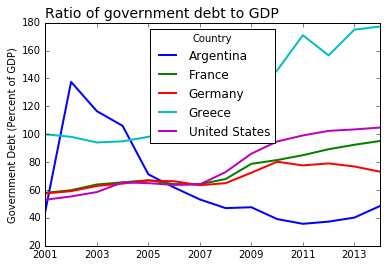

In [12]:
ax = debt.plot(lw=2)
ax.set_title('Ratio of government debt to GDP', fontsize=14, loc='left')
ax.set_ylabel('Government Debt (Percent of GDP)')

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Example:  Apple and Google stock prices 

In [27]:
import pandas.io.data as web
import datetime as dt 

start = dt.datetime(1980, 1, 1)
end   = dt.date.today()
prices = web.DataReader(['aapl', 'goog'], 'google', start, end)

In [23]:
list(prices)

['Open', 'High', 'Low', 'Close', 'Volume']

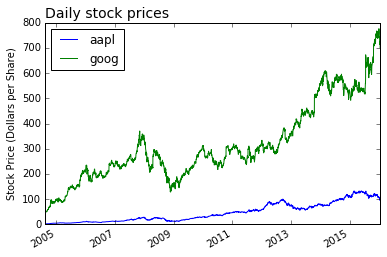

In [19]:
ax = prices['Close'].dropna().plot()
ax.set_title('Daily stock prices', fontsize=14, loc='left')
ax.set_xlabel('')
ax.set_ylabel('Stock Price (Dollars per Share)')

## Example:  Fama-French equity "factors"

Gene Fama and Ken French are two of the leading academics studying (primarily) equity returns.  We'll look at what have come to be called the Fama-French factors, available on [French's website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html).  The data includes:

* xsm:  the return on the market (aggregate equity) minus the riskfree rate
* smb (small minus big):  the return on small firms minus the return on big firms 
* hml (high minus low):  the return on firms with high book-to-market ratios minus the return on those with low ratios. 
* rf:  the riskfree rate. 

In [2]:
# load packages 
import pandas.io.data as web      

# read data from Ken French's website 
ff = web.DataReader('F-F_Research_Data_Factors', 'famafrench')[0] 
# NB:  ff.xs is a conflict, rename to xsm  
ff.columns = ['xsm', 'smb', 'hml', 'rf']

C:\Users\dbackus\Anaconda3\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


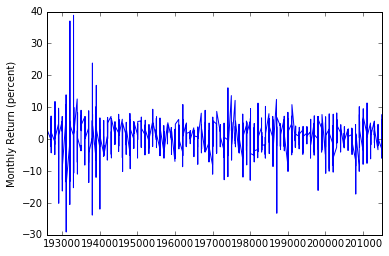

In [28]:
# some plots 
ax = ff['xsm'].plot()
ax.set_ylabel('Monthly Return (percent)')
#ax.set_xticks([1950, 1, 1), (1990, 1, 1)])  # fix x-axis "ticks"

In [11]:
# statistics 
ff.describe()

,xsm,smb,hml,rf
count,1073.000000,1073.000000,1073.000000,1073.000000
mean,0.650075,0.216822,0.383551,0.280988
std,5.390756,3.223172,3.529946,0.254635
min,-29.130000,-16.700000,-13.280000,-0.060000
25%,-2.020000,-1.560000,-1.290000,0.040000
50%,1.010000,0.060000,0.220000,0.250000
75%,3.650000,1.790000,1.730000,0.430000
max,38.850000,36.700000,35.460000,1.350000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000097E3208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000096DCF60>]], dtype=object)

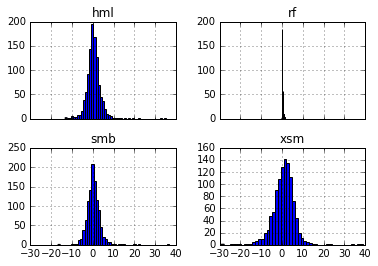

In [29]:
# histograms 
ff.hist(bins=50, sharex=True)

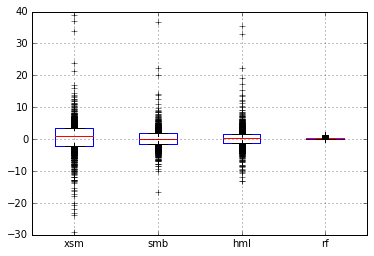

In [30]:
ff.boxplot(whis=0, return_type='axes')

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

---

## Example:  Income by College Major 

From the 538 blog.  

In [31]:
url1 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/'
url2 = 'college-majors/recent-grads.csv'
url = url1 + url2
df538 = pd.read_csv(url)
df538 = df538.set_index('Major')
df538['Median'] = df538['Median']/1000
df538.shape

(173, 20)

In [32]:
df538.head()

,Rank,Major_code,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Major,,,,,,,,,,,,,,,,,,,,
PETROLEUM ENGINEERING,1,2419,Engineering,2339,36,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110,95000,125000,1534,364,193
MINING AND MINERAL ENGINEERING,2,2416,Engineering,756,7,679,77,0.101852,640,556,170,388,85,0.117241,75,55000,90000,350,257,50
METALLURGICAL ENGINEERING,3,2415,Engineering,856,3,725,131,0.153037,648,558,133,340,16,0.024096,73,50000,105000,456,176,0
NAVAL ARCHITECTURE AND MARINE ENGINEERING,4,2417,Engineering,1258,16,1123,135,0.107313,758,1069,150,692,40,0.050125,70,43000,80000,529,102,0
CHEMICAL ENGINEERING,5,2405,Engineering,32260,289,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65,50000,75000,18314,4440,972


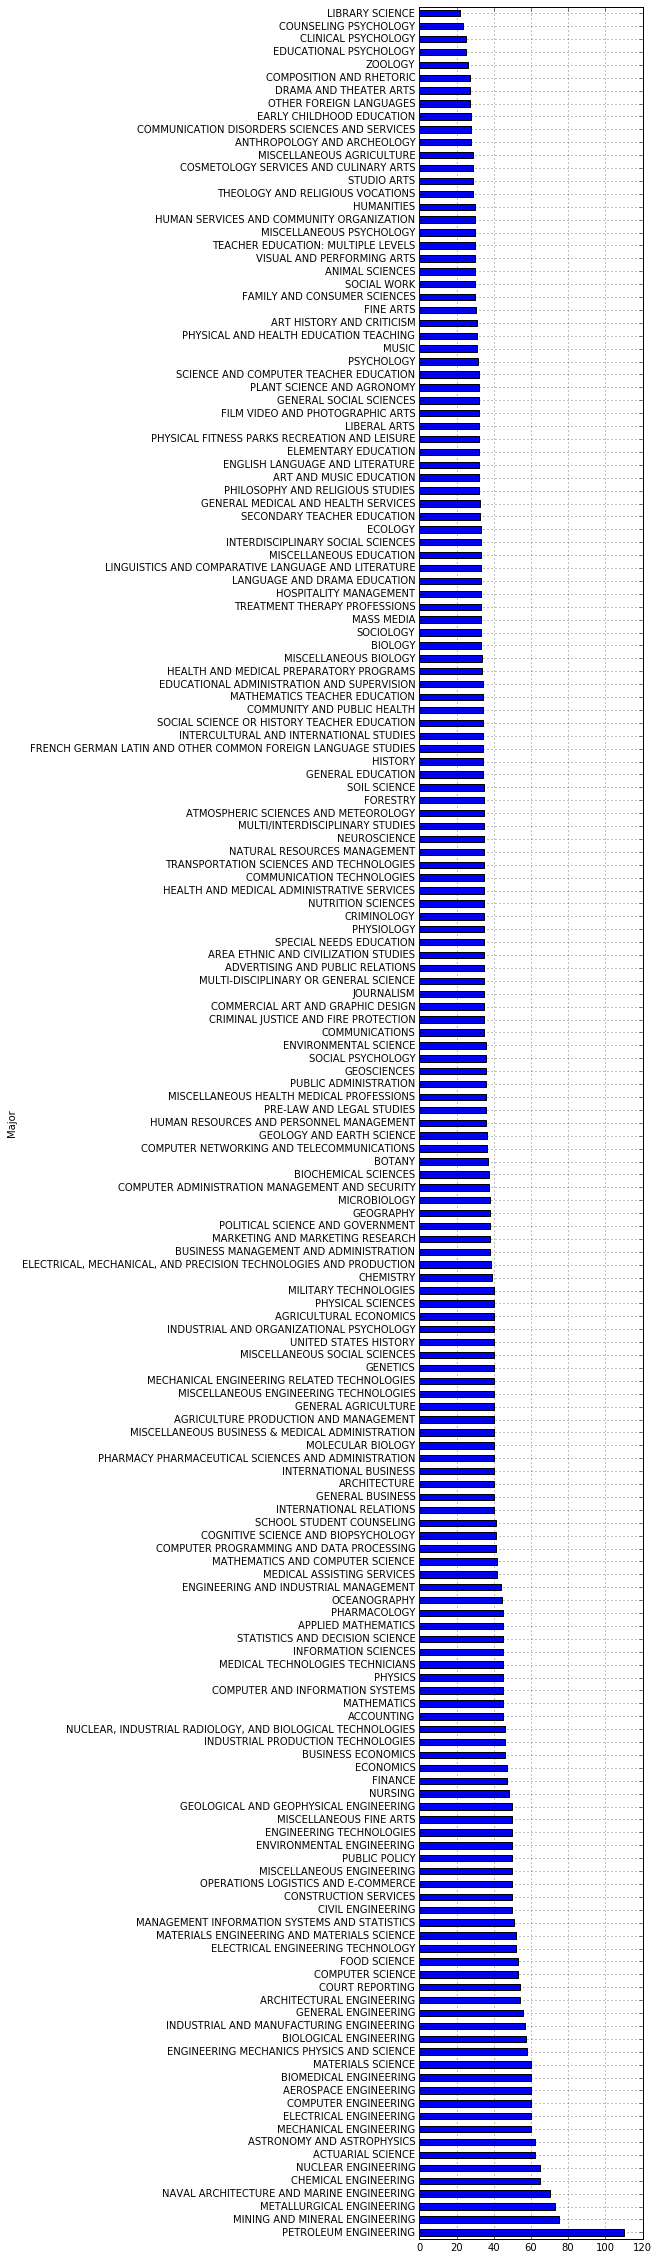

In [33]:
ax = df538['Median'].plot(kind='barh', figsize=(4, 40), grid=True)

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Example:  Japan's aging population 

Data from the [UN's Population Division](http://esa.un.org/unpd/wpp/Download/Standard/Population/).  

In [34]:
%%time
url1 = 'http://esa.un.org/unpd/wpp/DVD/Files/'
url2 = '1_Indicators%20(Standard)/EXCEL_FILES/1_Population/'
url3 = 'WPP2015_POP_F07_1_POPULATION_BY_AGE_BOTH_SEXES.XLS'
url = url1 + url2 + url3 

cols = [2, 4, 5] + list(range(6,28))
#est = pd.read_excel(url, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])
prj = pd.read_excel(url, sheetname=1, skiprows=16, parse_cols=cols, na_values=['…'])

"""
for later:  change cols for the two sources, rename 80+ to 80-84, then concat 
#pop = pd.concat([est, prj], axis=0, join='outer')      
"""
pop = prj 

Wall time: 1min 14s


In [35]:
# rename some variables 
pop = pop.rename(columns={'Reference date (as of 1 July)': 'Year', 
                          'Major area, region, country or area *': 'Country', 
                          'Country code': 'Code'})
# select Japan and years 
countries = ['Japan']
years     = [2015, 2025, 2035, 2045, 2055, 2065]
pop = pop[pop['Country'].isin(countries) & pop['Year'].isin(years)]
pop = pop.drop(['Country', 'Code'], axis=1)
pop = pop.set_index('Year').T

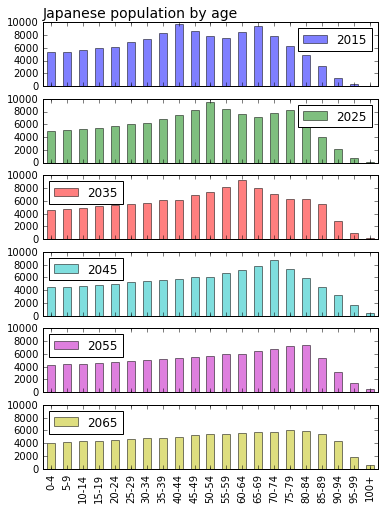

In [36]:
ax = pop.plot(kind='bar', #color='blue', 
              alpha=0.5, subplots=True, sharey=True, figsize=(6, 8))
for axnum in range(len(ax)):  
    ax[axnum].set_title('')
    
ax[0].set_title('Japanese population by age', fontsize=14, loc='left')   

### Questions

* What did you learn?
* What else would you like to know?
* Where does the data come from?    

**Question for Chase or Spencer:**  Can we set up an interaction here?